# Logistic Regression for Lyrics Genre Classification

Text classification is the task of sorting text documents into predefined classes. 

## Data set

The data bla bla..

We start by loading these files into two separate data frames.

In [19]:
import pandas as pd
import numpy as np
import zipfile
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
#import bz2

# Loading data to a pandas dataframe
with zipfile.ZipFile('data/spotify_songs.csv.zip') as zip:
    with zip.open('spotify_songs.csv') as myZip:
        data = pd.read_csv(myZip) 

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [20]:
from helper_functions import preprocess_lyrics
df = preprocess_lyrics(data)
df.head()

,text,label
1,"The trees, are singing in the wind The sky blu...",0
2,"NA Yeah, Spyderman and Freeze in full effect U...",1
3,I really can't stay Baby it's cold outside I'v...,1
4,Get up out of my business You don't keep me fr...,2
5,"Hold your breath, don't look down, keep trying...",1


Name of genres in data.

In [21]:
genres = sorted(df['label'].unique())
print(genres)

[0, 1, 2, 3, 4, 5]


## Visualization

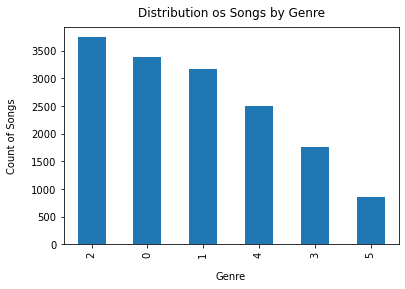

In [22]:
import matplotlib.pyplot as plt

#party_color = ['red', 'deepskyblue', 'green', 'yellow', 'darkred', 'olivedrab', 'slateblue', 'mediumblue']

df['label'].value_counts().plot(kind='bar')
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Count of Songs", labelpad=14)
plt.title("Distribution os Songs by Genre", y=1.02)
plt.show()

In [23]:
# Split train and test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])

# Split train and validation
print(df.shape)
print(train_df.shape)
print(test_df.shape)

(15405, 2)
(12324, 2)
(3081, 2)


## Train Model

### Baseline models

In [24]:
# Train model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

/home/oriol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


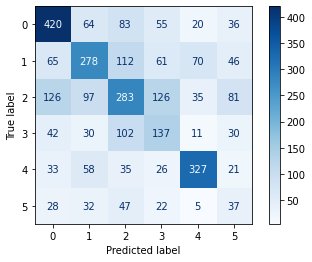

In [25]:
# Logistic Regression with Counter Words Vector representation - Default values kind of thing

pipe = Pipeline(steps=[('preprocessor', CountVectorizer(stop_words='english')),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

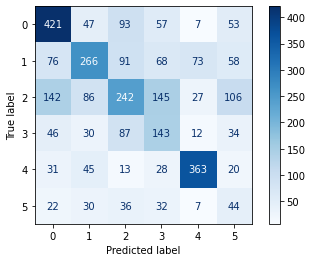

In [26]:
# Logistic Regression with TF-IDF representation - Default values kind of thing

from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english')),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

### Grid Search

# Logistic Regression with Counter Words Vector representation


from sklearn.model_selection import GridSearchCV

# Hyperparameters values
parameters = {'preprocessor__binary':[True, False],
              'preprocessor__ngram_range':((1,1),(1,2),(2,2)),
              'model__penalty': ('l2','elasticnet'),
              'model__solver': ('newton-cg', 'saga')}

grid_search = GridSearchCV(pipe, parameters)

gs_fit = grid_search.fit(train_df['text'], train_df['label'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

### Fine-tuned Models

#### Logistic Regression with TF-IDF Vector representation

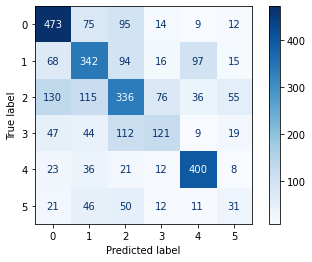

In [27]:
# Logistic Regression with TF-IDF representation

from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english',
                                                        ngram_range=(1,2),
                                                        binary=True)),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced',
                                                    penalty='l2',
                                                    solver='newton-cg'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

In [28]:
preds = fit_pipe.predict(test_df['text'])

print(classification_report(test_df['label'], preds, zero_division = 0))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       678
           1       0.52      0.54      0.53       632
           2       0.47      0.45      0.46       748
           3       0.48      0.34      0.40       352
           4       0.71      0.80      0.75       500
           5       0.22      0.18      0.20       171

    accuracy                           0.55      3081
   macro avg       0.51      0.50      0.50      3081
weighted avg       0.54      0.55      0.54      3081



## Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [29]:
# TODO: Write code here to implement undersampling
# Number of observations of the smallest class
n_min = min(train_df['label'].value_counts())

# Sample n_min observations of each class
balanced = train_df.groupby('label').apply(lambda x: x.sample(n=n_min, replace=False))

print(balanced.shape)

(4116, 2)


#### LR with TF-IDF / fine-tuned / balanced

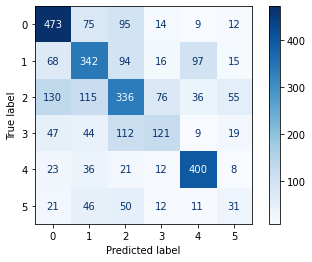

In [30]:
# Logistic Regression with TF-IDF representation

from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english',
                                                        ngram_range=(1,2),
                                                        binary=True)),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced',
                                                    penalty='l2',
                                                    solver='newton-cg'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

## Results